In [1]:
# Install the required packages
%pip install numpy matplotlib scikit-learn pandas

import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import fetch_openml

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# Fetch mnist dataset
mnist = fetch_openml('mnist_784')
x, y = mnist['data'], mnist['target']

# Normalize pixel values to 0 or 1
x = x / 255

# Pick 10% sample of the dataset
indices = np.random.choice(len(x), int(len(x) * 0.1), replace=False)
subset_x, subset_y = x.iloc[indices], y.iloc[indices]

In [12]:
from sklearn.neighbors import KNeighborsClassifier 

def leave_one_out_knn_accuracy(x, y, k_values):
    results = {}

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        accuracies = []
        correct = 0
        total = 0

        for i in range(len(x)):
            # Training samples (indices other than i)
            indices = np.arange(len(x)) != i
            test_index = np.array([i])
            x_sample, y_sample = x[indices], y[indices]

            # Leave-out sample (i-th index)
            loo_x = x.iloc[test_index] 
            loo_y = y.iloc[test_index]


            # train model
            knn.fit(x_sample, y_sample)
            prediction = knn.predict(loo_x)

            # Calculate accuracy
            correct += (prediction == loo_y).sum()
            total +=1
        
        accuracy = correct/total
        results[k] = accuracy

    return results

In [13]:
# Test predictions
k_values = range(1,11)
test_result = leave_one_out_knn_accuracy(subset_x, subset_y, k_values)

test_result

{1: np.float64(0.9388571428571428),
 2: np.float64(0.9272857142857143),
 3: np.float64(0.9381428571428572),
 4: np.float64(0.9357142857142857),
 5: np.float64(0.935),
 6: np.float64(0.9314285714285714),
 7: np.float64(0.9322857142857143),
 8: np.float64(0.933),
 9: np.float64(0.9318571428571428),
 10: np.float64(0.9305714285714286)}

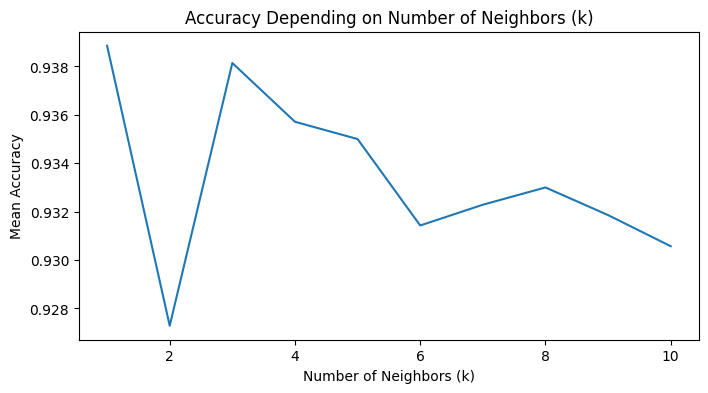

In [16]:
plt.figure(figsize=(8,4))
plt.plot(test_result.keys(), test_result.values())
plt.title("Accuracy Depending on Number of Neighbors (k)")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Mean Accuracy")
plt.show()